# Airline Customer Satisfaction Prediction
Anggota Kelompok:
1. Rafael Nicholas Tanaja - 2540118656
2. Kevina Nugraha Eleeas - 2540120585 
3. Raiyen Dewi Kusuma - 2540118725


--------

# 1. Project Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, accuracy_score

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 2. Brief Data Overview

Di dalam project ini, kami akan menggunakan `train.csv` terlebih dahulu untuk mencari model yang cocok untuk data ini.

Lalu, kami akan menggunakan `train.csv` dan `test.csv` untuk pengaplikasian model yang telah terpilih

In [2]:
# membuat copy dataframe `df_eda` untuk digunakan pada saat proses EDA.
df_ori = pd.read_csv("train.csv") 
df_eda = df_ori.copy()

In [3]:
df_eda.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
# memeriksa datatype setiap kolom yang ada di dataframe.
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [5]:
# memeriksa berapa banyak missing value (NA).
df_eda.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [6]:
# men-drop missing values yang ada pada dataframe.
df_eda.dropna(inplace=True)

In [7]:
# men-drop kolom yang tidak digunakan pada project.
df_eda.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

In [8]:
def rename_func (x):
    """Mengubah nama setiap kolom menjadi lebih mudah dibaca
    1. Menggantikan spasi menjadi underscore.
    2. Menggantikan garis miring menjadi underscore.
    3. Mengubah semua huruf menjadi huruf kecil.
    4. Menghapus spasi yang ada pada sisi kiri dan kanan nama.
    """
    return x.replace(" ", "_").replace("/", "_").lower().strip()

In [9]:
# membuat dictionary untuk menampung nama yang akan diubah serta hasil nama yang telah diubah
# dengan fungsi rename_func()
rename = {x: rename_func(x) for x in df_eda.columns}

In [10]:
# sebelum dan sesudah pengaplikasian fungsi rename_func()
rename

{'Gender': 'gender',
 'Customer Type': 'customer_type',
 'Age': 'age',
 'Type of Travel': 'type_of_travel',
 'Class': 'class',
 'Flight Distance': 'flight_distance',
 'Inflight wifi service': 'inflight_wifi_service',
 'Departure/Arrival time convenient': 'departure_arrival_time_convenient',
 'Ease of Online booking': 'ease_of_online_booking',
 'Gate location': 'gate_location',
 'Food and drink': 'food_and_drink',
 'Online boarding': 'online_boarding',
 'Seat comfort': 'seat_comfort',
 'Inflight entertainment': 'inflight_entertainment',
 'On-board service': 'on-board_service',
 'Leg room service': 'leg_room_service',
 'Baggage handling': 'baggage_handling',
 'Checkin service': 'checkin_service',
 'Inflight service': 'inflight_service',
 'Cleanliness': 'cleanliness',
 'Departure Delay in Minutes': 'departure_delay_in_minutes',
 'Arrival Delay in Minutes': 'arrival_delay_in_minutes',
 'satisfaction': 'satisfaction'}

In [11]:
# mengubah nama kolom
df_eda.rename(columns=rename,
          inplace=True)

In [12]:
df_eda.columns

Index(['gender', 'customer_type', 'age', 'type_of_travel', 'class',
       'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on-board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

----

# 3. Exploratory Data Analysis (EDA)

Pengelompokkan Tipe Kolom

categorical: Gender, Customer Type, Type of Travel, Class, Satisfaction

Ordinal : Inflight Wifi Service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Check-in service, Inflight service, Cleanliness,

numerical : Age, Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes, 

In [13]:
categorical = ['gender', 'customer_type', 'type_of_travel', 'class', 'satisfaction']

num = ['age', 'flight_distance', 'departure_delay_in_minutes', 
       'arrival_delay_in_minutes']

ordinal = ['inflight_wifi_service', 'departure_arrival_time_convenient', 
           'ease_of_online_booking', 'gate_location', 'food_and_drink', 
           'online_boarding', 'seat_comfort', 'inflight_entertainment', 
           'on-board_service', 'leg_room_service', 'baggage_handling', 
           'checkin_service', 'inflight_service', 'cleanliness']

# memeriksa apakah jumlah kolom telah sama
len(categorical) + len(num) + len(ordinal) == len(df_eda.columns) 

True

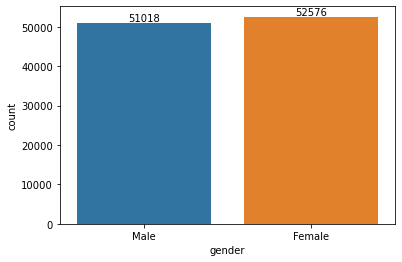

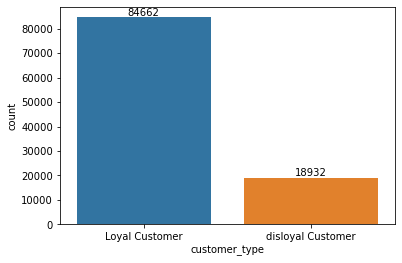

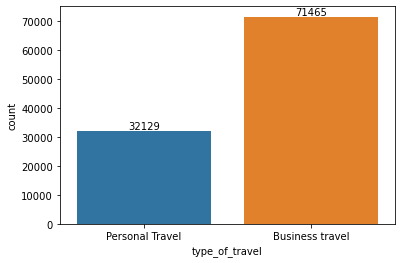

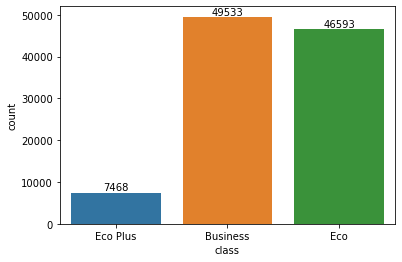

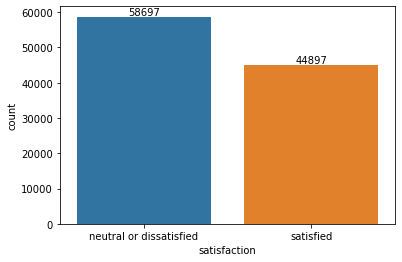

In [14]:
for x in categorical:
    ax = sns.countplot(x, data=df_eda)
    ax.bar_label(ax.containers[0])
    plt.show()

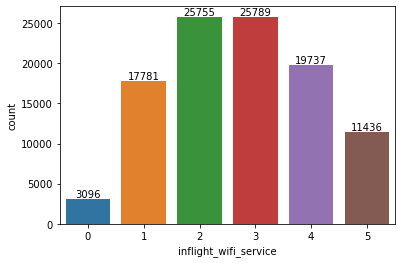

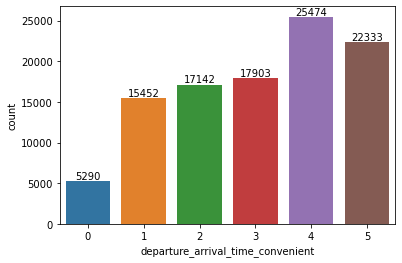

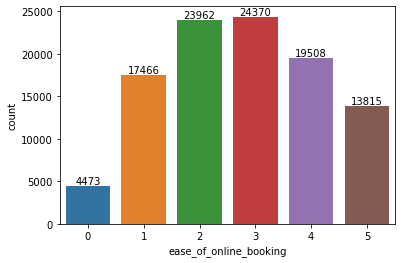

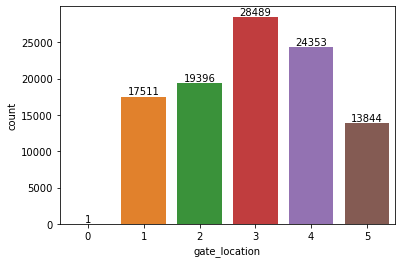

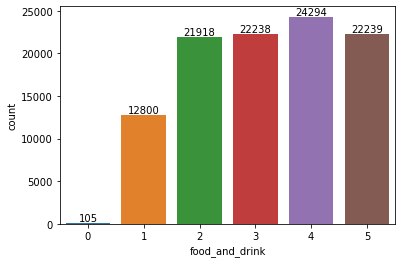

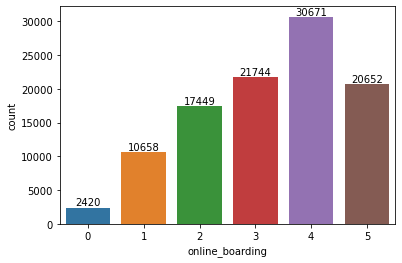

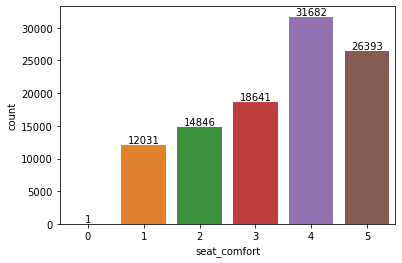

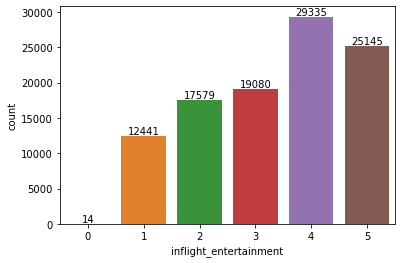

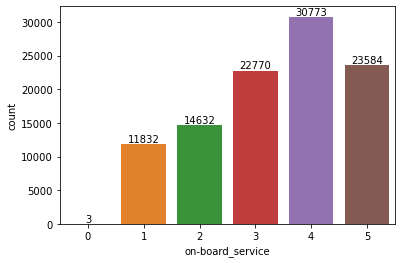

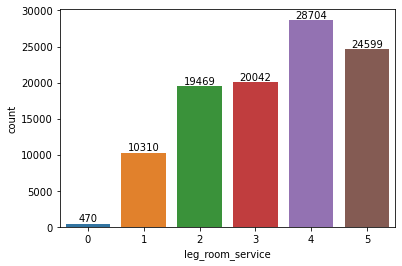

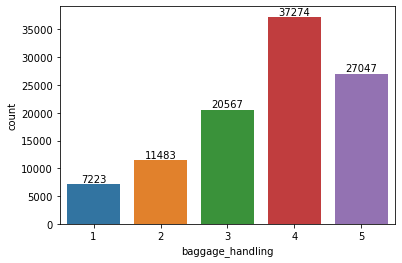

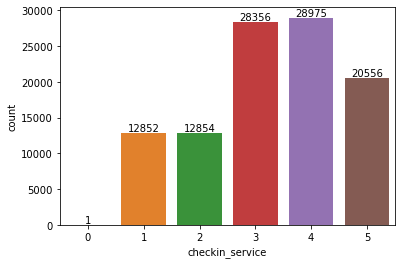

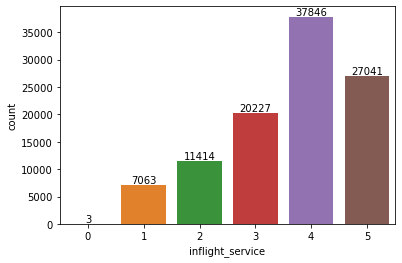

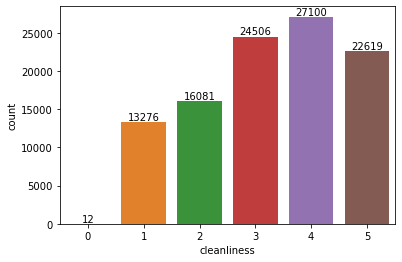

In [15]:
for x in ordinal:
    ax = sns.countplot(x, data=df_eda)
    ax.bar_label(ax.containers[0])
    plt.show()

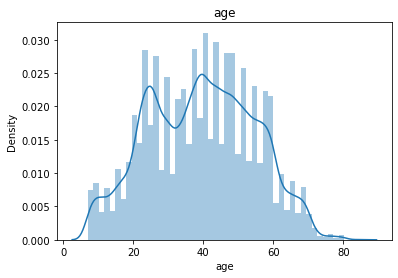

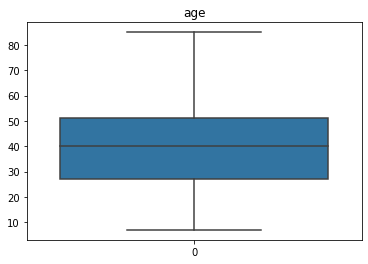

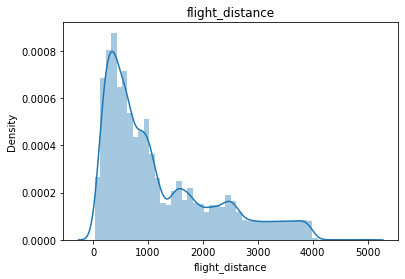

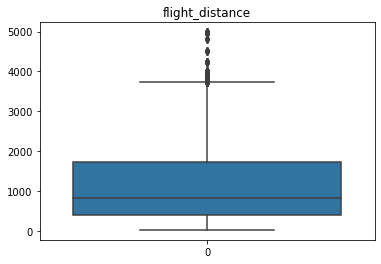

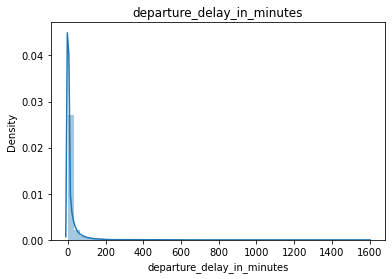

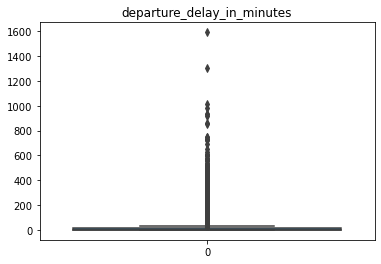

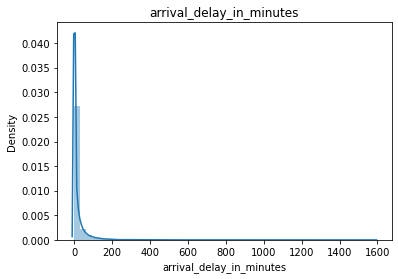

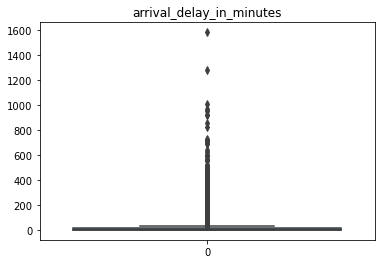

In [16]:
for x in num:
    sns.distplot(df_eda[x])
    plt.title(x)
    plt.show()
    
    sns.boxplot(data=df_eda[x])
    plt.title(x)
    plt.show()
    print("\n")

_______

# 4. Modelling

## a. Feature Engineering

In [17]:
def feature_cleaning_engineering(df):
    
    # men-drop missing values
    df.dropna(inplace=True)

    # men-drop kolom yang tidak digunakan
    df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)
    
    # mengubah penamaan kolom agar mudah dibaca
    rename = {x: x.replace(" ", "_").replace("/", "_").lower().strip() for x in df.columns}
    df.rename(columns=rename, inplace=True)
    
    # memakai LabelEncoder() agar kolom berisikan data yang dapat dibaca oleh algoritma
    le = LabelEncoder()
    df['gender'] = le.fit_transform(df['gender'])
    df['customer_type'] = le.fit_transform(df['customer_type'])
    df['type_of_travel'] = le.fit_transform(df['type_of_travel'])
    df['class'] = le.fit_transform(df['class'])
    df['satisfaction'] = le.fit_transform(df['satisfaction'])
    
    # memisah antara data (X) dengan target variable (y)
    X = df.drop(['satisfaction'], axis=1)
    y = df['satisfaction']
    
    # memakai StandardScaler() untuk menormalisasi data
    standard_scale = StandardScaler()
    standard_scale.fit_transform(X)
    
    # menghasilkan dataframe yang sudah rapi (df), data (X), target variable (y)
    return df, X, y

In [18]:
df_processed, X, y = feature_cleaning_engineering(df_ori)

## b. Fitting

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state=128)


#### Light GBM

Mencoba algoritma Light GBM pada data.

In [20]:
import lightgbm

In [21]:
lgb = lightgbm.LGBMClassifier()

In [22]:
lgb.fit(X_train, y_train)

LGBMClassifier()

In [23]:
lgb_pred = lgb.predict(X_test)

In [24]:
print(f"mislabel : {np.sum(y_test != lgb_pred)}")

print(np.mean(cross_val_score(lgb, X, y, cv=10))*100)
# print("cross val score : 95.9486989058252")

print(classification_report(lgb_pred, y_test))
print(confusion_matrix(lgb_pred, y_test))

mislabel : 707
96.41967721724455
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     12019
           1       0.94      0.98      0.96      8700

    accuracy                           0.97     20719
   macro avg       0.96      0.97      0.97     20719
weighted avg       0.97      0.97      0.97     20719

[[11525   494]
 [  213  8487]]


#### CatBoostClassifier

Mencoba algoritma CatBoostClassifier pada data.

In [25]:
from catboost import CatBoostClassifier

In [26]:
cbc = CatBoostClassifier(iterations=100)

cat_features = list(range(0, X.shape[1]))

cbc.fit(X_train, y_train)

cbc_pred1 = cbc.predict(X_test)

Learning rate set to 0.5
0:	learn: 0.2983827	total: 158ms	remaining: 15.7s
1:	learn: 0.2056765	total: 171ms	remaining: 8.38s
2:	learn: 0.1727678	total: 184ms	remaining: 5.94s
3:	learn: 0.1600304	total: 199ms	remaining: 4.76s
4:	learn: 0.1506971	total: 213ms	remaining: 4.04s
5:	learn: 0.1414409	total: 226ms	remaining: 3.54s
6:	learn: 0.1375181	total: 239ms	remaining: 3.17s
7:	learn: 0.1280293	total: 252ms	remaining: 2.89s
8:	learn: 0.1252931	total: 264ms	remaining: 2.67s
9:	learn: 0.1240522	total: 277ms	remaining: 2.49s
10:	learn: 0.1177457	total: 289ms	remaining: 2.34s
11:	learn: 0.1158671	total: 301ms	remaining: 2.21s
12:	learn: 0.1123228	total: 314ms	remaining: 2.1s
13:	learn: 0.1107189	total: 327ms	remaining: 2.01s
14:	learn: 0.1098406	total: 339ms	remaining: 1.92s
15:	learn: 0.1077328	total: 353ms	remaining: 1.85s
16:	learn: 0.1060261	total: 367ms	remaining: 1.79s
17:	learn: 0.1047303	total: 379ms	remaining: 1.72s
18:	learn: 0.1035198	total: 393ms	remaining: 1.68s
19:	learn: 0.1029

In [27]:
print(f"mislabel : {np.sum(y_test != cbc_pred1)}")

# print(np.mean(cross_val_score(cbc, X, y, cv=10))*100)
print("cross val score : 95.9486989058252")

print(classification_report(cbc_pred1, y_test))
print(confusion_matrix(cbc_pred1, y_test))

mislabel : 740
cross val score : 95.9486989058252
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     11952
           1       0.95      0.97      0.96      8767

    accuracy                           0.96     20719
   macro avg       0.96      0.97      0.96     20719
weighted avg       0.96      0.96      0.96     20719

[[11475   477]
 [  263  8504]]


-----------

### Memakai `train.csv` and `test.csv`

In [28]:
test_df = pd.read_csv("test.csv")

In [29]:
test_df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [30]:
test_df, X_test1, y_test1 = feature_cleaning_engineering(test_df)

Menggunakan Light GBM sebagai model akhir

In [31]:
lgb_all = lightgbm.LGBMClassifier()

lgb_all.fit(X, y)

lgb_pred2 = lgb_all.predict(X_test1)

In [32]:
print(f"mislabel : {np.sum(y_test1 != lgb_pred2)}")

#print(np.mean(cross_val_score(cbc_all, X, y, cv=10))*100)
print("cross val score : 95.9486989058252")

print(classification_report(lgb_pred2, y_test1))
print(confusion_matrix(lgb_pred2, y_test1))

mislabel : 930
cross val score : 95.9486989058252
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     14894
           1       0.94      0.97      0.96     10999

    accuracy                           0.96     25893
   macro avg       0.96      0.97      0.96     25893
weighted avg       0.96      0.96      0.96     25893

[[14246   648]
 [  282 10717]]


--------